####  1 / For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. 

Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.



In [11]:
import warnings
warnings.filterwarnings('ignore')

***** OVERVIEW EXERCISES *****

### 1    a /  Has the network latency gone up since we switched internet service providers?  


#### Null Hypothesis : Our network latency has remained consistent throughout time.
*Prefer : Latency has either remained consistend or decreased since switching ISPs.*

#### Alternate Hypothesis : There has been a change in our network latency since changing ISPs.
*Prefer : Latency has increased.*

- True Positive : Network latency has slowed down, and, thus, thinking that there has been no change is erroneous.  
- True Negative : There has been a change in our network latency recently, but it's not due to having changed ISPs.  
- Type I Error (False Positive) : It doesn't make sense that diagnostic tests say that our network latency is the same as it had been ; I'm sure that actions are taking longer to perform.  
- Type II Error (False Negative) : Everything's hunky-dory. What ? No, same as always.  


### 2    b /  Is the website redesign any good?  

#### Null Hypothesis : The website redesign is as successful or less successful in capturing hits than the previous version.
#### Alternate Hypothesis : The website redesign will have higher click-through rates than the previous version.

- True Positive : The redesign provides a much more intuitive and visually attractive website.  
- True Negative : Even though the redesigned website looks a lot better, the results are the same as before.  
- Type I Error (False Positive) : They say that there's no difference in click-through numbers, but it seems that people are more excited to visit our website. 
- Type II Error (False Negative) : The numbers might not have changed since the redesign, so the redesign was a waste of money.  
(Prefer : No significant increase in traffic.)

### 3    c /  Is our television ad driving more sales?  

#### Null Hypothesis : The television advert has a negative or no influence on sales rates. (Sales rates did not increase.)
#### Alternate Hypothesis : Sales have increased since the television advert started airing.

- True Positive : More people are buying our product and visiting our shops.  
- True Negative : More people are visiting our shops, so they must be intending to buy our product more, even though the numbers don't match up. Maybe they'll be back next week.  
- Type I Error (False Positive) :  People visiting our shops mention the TV advert, so they must be buying more.
- Type II Error (False Negative) : I'm sure that sales have increased. My mom said that she bought something there yesterday.

***** Comparing Means / T-Test Exercises *****

#### 1 /     Answer with the type of test you would use (assume normal distribution)

##### 1 / a  /  Is there a difference in grades of students on the second floor compared to grades of all students?

1-SAMPLE T-TEST because comparing to population.  Two-tail test, because comparing two different sides.

##### 1 / b / Are adults who drink milk taller than adults who don't drink milk?



Two-sample (adults who drink milk and those who don't), aka Independent.  

One-tail, because we're looking at the two categories, but are the adults TALLER THAN, the comparison operation, makes it 1-tail.

##### 1 / c /         Is the price of gas higher in Texas or in New Mexico?

Use an independent T-Test.  
1-tail, bc figuring out which is greater.

##### 1 / d /         Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

Use an ANOVA Test.   

More than two groups, so ANOVA to take all groups into account.

### 3 /    Load the mpg dataset and use it to answer the following questions:


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import env
import numpy as np
from pydataset import data

from scipy import stats

np.random.seed(3333)

In [2]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


##### 3 / a / Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

Type of test : Independent T-Test

$H_0$ : The fuel effciency for cars from 2008 and 1999 is equal.  
$H_a$ : There is a significant difference in fuel effciency for cars from 2008 and 1999.

In [3]:
mpg.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [4]:

mpg[mpg['average_mileage'] == (mpg.cty.mean() + mpg.hwy.mean())]
mpg.head()

# a way to return the average mileage

KeyError: 'average_mileage'

In [ ]:
mpg['average_mileage'] = (mpg['cty'] + mpg['hwy']) / 2

mpg

# another way to return the average mileage : makes a new column and calculates the mean mpg

In [ ]:
average_mpg = mpg[mpg['average_mileage'] == (mpg.cty.mean() + mpg.hwy.mean())]
average_mpg

# not correct format

In [ ]:
Y2008 = mpg[mpg.year == 2008].average_mileage
Y1999 = mpg[mpg.year == 1999].average_mileage

# gets the average mileage for both years on the df

In [ ]:
## alternate

In [ ]:
## alternate, in-class 


Y2008_alt = mpg[mpg['year'] == 2008]['average_mileage'].head()

In [ ]:
## alternate, in-class 


new = mpg[mpg['year'] == 2008]['average_mileage']
old = mpg[mpg['year'] == 1999]['average_mileage']

In [ ]:
Y1999.head()

#### 2-Tailed¶(comparing two independent values)

   -  Compare p to alpha
   -  If p < alpha, reject H_0.



In [ ]:
# setting the α
α = 0.05

print(Y2008.var())
print(Y1999.var())


In [ ]:
(Y1999.sum() - Y2008.sum())

In [ ]:
t_mpg, p_mpg = stats.ttest_ind(Y1999, Y2008, equal_var = False)
t_mpg, p_mpg

In [ ]:
stats.levene(Y1999, Y2008)

In [ ]:
if p_mpg <= α:
    print("We reject the null hypothesis.")
else: 
    print('We failt to reject the the null hypothesis.')

Conclusion : While there is a difference in average mileage for cars form 2008 and cars from 1999, the difference is not significant.

##### 3 / b / Are compact cars more fuel-efficient than the average car?

Type of test : 1-sample T-Test, 1-tail

$H_0$ : Compact cars are not more fuel efficient than the average car.  
$H_a$ : Compact cars are more fuel-efficient that the average car.
    


In [ ]:
mpg['class'].unique()

## finding all the types of car classes.

In [ ]:
## in-class alterante to the below

compacted = mpg[mpg['class'] == 'compact']['average_mileage']
compacted.head()

In [ ]:
compact = mpg[mpg['class'] == 'compact']

compact_avg_mileage = compact['average_mileage']

compact_avg_mileage.head()

## extracting the compact-class cars.

# compact_avg_mileage is the distribution of all compact mpgs

In [ ]:
compact_avg_mpgNO = (compact.average_mileage).mean()
compact_avg_mpgNO 

# find the average mileage of compact cars 

# THIS IS WRONG FOR stats.ttest_1samp, BECAUSE this is the mean of all compact cars ,not their 
# distrbution of mpgs

In [ ]:
all_avg_mpg = mpg['average_mileage'].mean()
all_avg_mpg

# this is an average, a single number, not a range, so it cannot have a variance

In [ ]:
print(compact_avg_mileage.var())

In [ ]:
t_comp, p_comp = stats.ttest_1samp(compact_avg_mileage, all_avg_mpg)

t_comp, p_comp/2

# There is no 'equal_var = False' in this equasion, because it's there's no range in the all_avg_mpg,
# it is not an independent test and there is no variance / range amongst the average mileage in a give set.

In [ ]:
if t_comp > 0 and p_comp/2 <= α:
    print("We reject the null hypothesis.")

else: 
    print('We fail to reject the the null hypothesis.')
    
# p/2 accounts for the 'greater than' part of the statement : we want something different from and greater.


Conclusion :
    
    Because compact cars are significantly more efficient than the average car, we REJECT the null hypothesis.

##### 3 / c /         Do manual cars get better gas mileage than automatic cars?

Type of test : Independant t-test, 1-tailed.

$H_0$ : Manual cars do not get better fuel mileage than automatic cars.  
$H_a$ : Manual cars get better gas mileage than automatic cars.

In [ ]:
manual_cars = mpg[mpg['trans'].str.startswith('m')]
manual_cars.head()

# extracts manual cars in a dataframe

In [ ]:
manual_mpg = manual_cars.average_mileage
manual_mpg.head()

# # extracts manual cars and their avg mpg from the dataframe and averages all compact average mpgs

In [ ]:
manual_mpg.mean()

In [ ]:
autom_cars = mpg[mpg['trans'].str.startswith('a')]
autom_cars.head()

# extracts automatic cars in a dataframe

In [ ]:

autom_mpg = autom_cars.average_mileage
autom_mpg.head()

# extracting the averge mpg for automatic cars from the df

In [ ]:
print(manual_mpg.var())
print(autom_mpg.var())

# checking the variance 

In [ ]:
t_ma, p_ma = stats.ttest_ind(manual_mpg, autom_mpg, equal_var = False)
t_ma, p_ma

*IN-CLASS EXAMPLE*

In [ ]:
manual_efficiency = mpg[mpg['trans'].str.startswith('m')]['average_mileage']

In [ ]:
automatic_efficiency = mpg[mpg['trans'].str.startswith('a')]['average_mileage']

In [ ]:
t4, p4 = stats.ttest_ind(manual_efficiency, automatic_efficiency, equal_var = False)

t4, p4

In [ ]:
if t4 > 0 and p/2 < α:
# manual cars more efficient (t4 > 0)
    print('Reject null.')
    
else:
    print('Fail to reject the null.')

Conclusion :
    
    Manual cars are significantly more fuel efficient than automatic cars, hence we reject the null hypothesis.

### 2 / Ace Realty wants to determine whether the average time it takes to sell homes is _different_ for its two offices.   

A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 

A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days.   
Use a .05 level of significance.  

*Probability distribution*

In [ ]:
office_one = stats.norm(90, 15)
office_two = stats.norm(100, 20)

In [ ]:
office_one

# tells us that we created an object, but doesn't tell us much, 
# except for where it's stored in my computer's memory

# need to get Python to return values to us

In [ ]:
dist_one = office_one.rvs(40)
dist_one

# take a random sampling of distribution

# returns an array

In [ ]:
dist_two = office_two.rvs(50)
dist_two

Run an independent test.  
But first, check the variance. 

Typically, if one variance is 4x (four times) the variance of another, set the variance to FALSE.

In [ ]:
print(dist_one.var())
print(dist_two.var())

In [ ]:
stats.levene(dist_one, dist_two)

# checking to see if the variances are equal.
# we know that they are different, bc the p-value is very small (< 0,05).

In [ ]:
t, p = stats.ttest_ind(dist_one, dist_two, equal_var = False)

t, p

# in a way, compares first variable (office_one) to 2nd.
# because negative, dist_one is less than dist_two

# ie, here, mean of office_one (dist_one, the first in the parentheses) is smaller than the mean of office_two

$H_O$ : There's no difference between the two distributions.  
$H_a$ : There's a significant difference between the two distributions.

In [ ]:
if p < α:
    print('Reject null.')
else:
    print('Fail to reject null.')

Conclusion :  
Because we have rejected the null hypothesis, we can understand that there is a significant difference in the time of sale between the two offices.

### <p style="background-color:pink;"> 02 Dec 2022 : Correlation Exercises

#### 1 /    Answer with the type of stats test you would use (assume normal distribution) :
       
a /  Is there a relationship between the length of your arm and the length of your foot ?  
    Use a Pearson's r test.  
    
b /  Do guys and gals quit their jobs at the same rate ?  
    Use an independent T-Test, 2-tailed.  

c /  Does the length of time of the lecture correlate with a student's grade ?  
    Use a Pearson's r test.  
    

### 2 / Use the telco_churn data.



In [ ]:
telco_df.columns

In [17]:
import env

db_url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/telco_churn'
telco_df = pd.read_sql('SELECT * FROM customers', db_url)


#### 2 / a / Does tenure correlate with monthly charges?

$H_0$ : There is NO linear relationship between tenure and monthly charges.  
$H_a$ : There is a linear relationship between tenure and monthly charges.


In [ ]:
x1 = telco_df.tenure
y1 = telco_df.monthly_charges

In [ ]:
corr, p = stats.pearsonr(x1, y1)
corr, p


In [ ]:
conf_interval = 0.95              # Desired confidence interval

α = 1 - conf_interval

p/2 < α

Conclusion :  
         We will reject the $H_0$ because p is less than α, therefore there is no linear relationship between 
     tenture and monthly charges.

#### 2 / b /  Does tenure correlate with total charges?


$H_0$ : There is NO linear relationship or correlation between tenure and total charges.  
$H_a$ : There is a linear relationship or correlation between tenure and total charges.


In [ ]:
telco_df['total_charges'].describe()

In [ ]:
no_charges = telco_df['total_charges'] == ' '
no_charges.sum()
# cheking for blanks in the total charges list

In [ ]:
telco_df[no_charges].head(3)

In [ ]:
telco_df['total_charges'] = telco_df['total_charges'].str.replace(' ', '0')


telco_df['total_charges'].astype('float')


telco_df['total_charges'] = telco_df['total_charges'].astype('float')

In [ ]:
telco_df['total_charges'].describe()

# yay, it's a float

In [ ]:
telco_df.count()

In [ ]:
x2 = telco_df.tenure
y2 = telco_df.total_charges

In [ ]:
corr2, p2 = stats.pearsonr(x2, y2)
corr2, p2


In [ ]:
p2/2 < α

Conclusion :  
         We will reject the $H_0$ because p is less than α, therefore there is no linear relationship between 
     tenture and total charges.

#### 2 / c / What happens if you control for phone and internet service ?


$H_0$ : There is NO linear relationship between tenure and monthly charges, when controlling for phone and internet service.  
$H_a$ : There is a linear relationship between tenure and monthly charges, when controlling for phone and internet service.

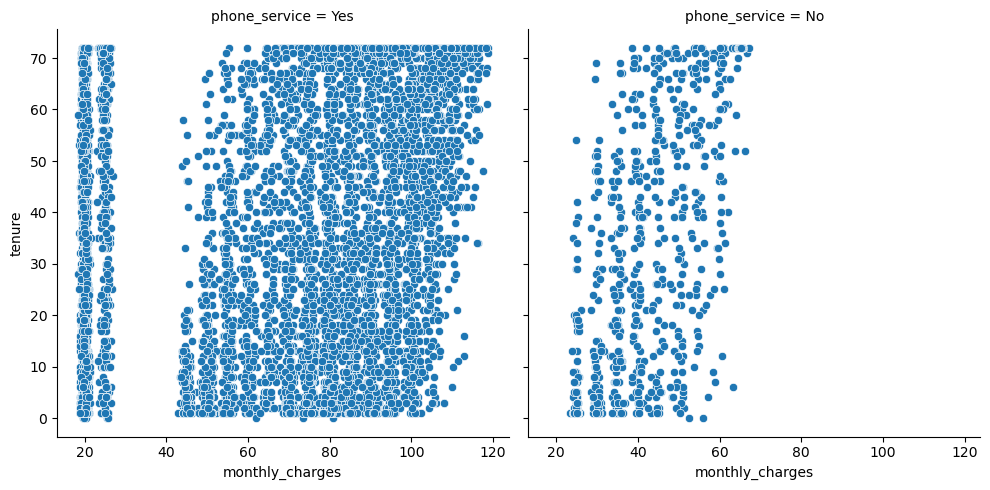

In [7]:
sns.relplot(data = telco_df, y = 'tenure', x = 'monthly_charges', col = 'phone_service')
plt.show()

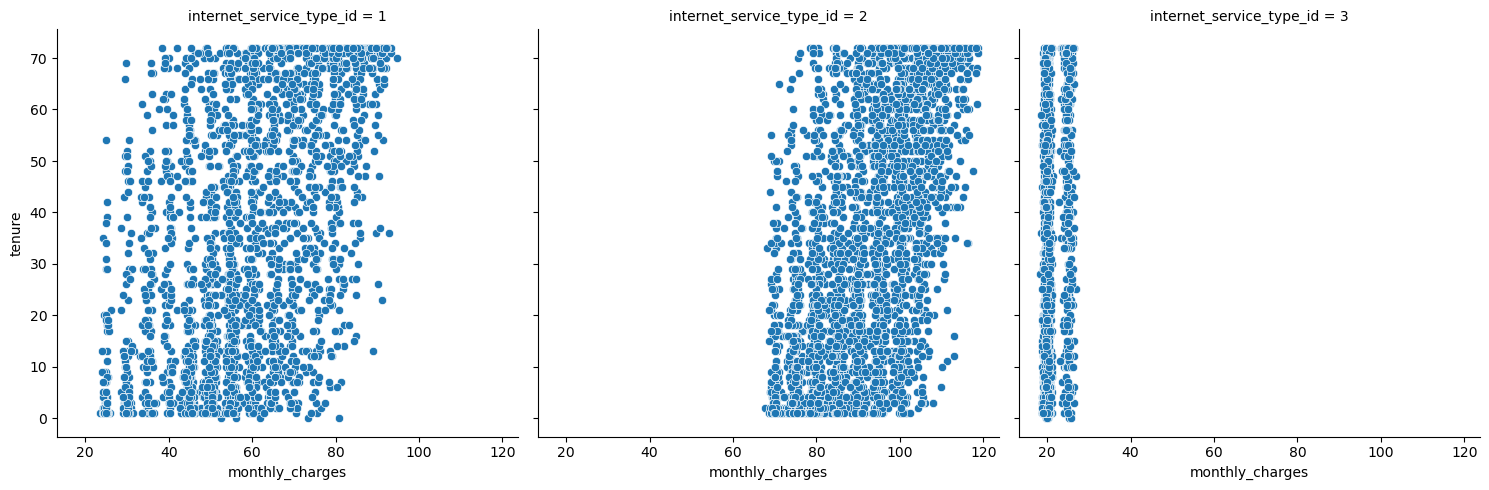

In [10]:
sns.relplot(data = telco_df, y = 'tenure', x = 'monthly_charges', col = 'internet_service_type_id')
plt.show()

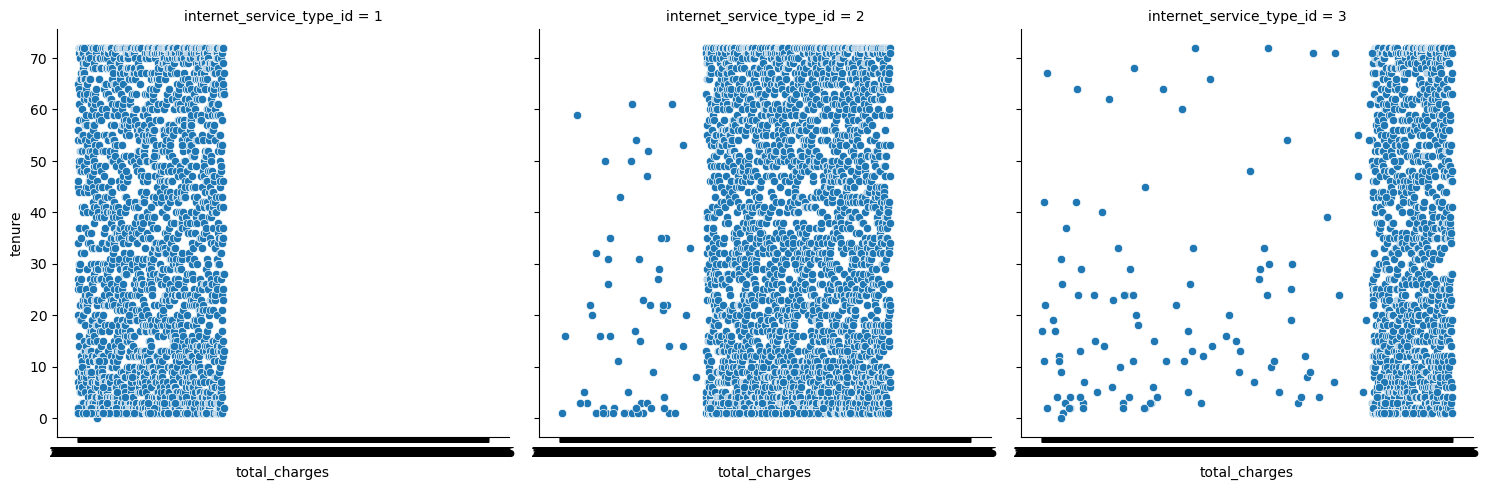

In [12]:
sns.relplot(data = telco_df, y = 'tenure', x = 'total_charges', col = 'internet_service_type_id')
plt.show()

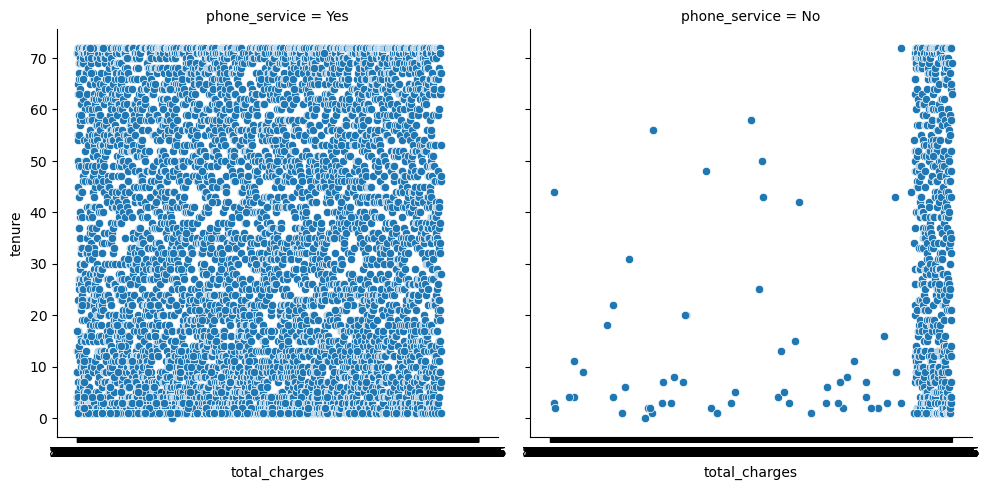

In [13]:
sns.relplot(data = telco_df, y = 'tenure', x = 'total_charges', col = 'phone_service')
plt.show()

In [ ]:

        

        Is there a relationship between how long an employee has been with the company and the number of titles they have had?
    Use the sleepstudy data.
        Is there a relationship between days and reaction time?


  ### 3 /  Use the employees database.

In [16]:

db_url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/employees'
emp_df = pd.read_sql('SELECT * FROM employees', db_url)


In [26]:

db_url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/employees'
titles_df = pd.read_sql('SELECT * FROM titles', db_url)

#### 3 / a /         Is there a relationship between how long an employee has been with the company and their salary?

In [25]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      300024 non-null  int64 
 1   birth_date  300024 non-null  object
 2   first_name  300024 non-null  object
 3   last_name   300024 non-null  object
 4   gender      300024 non-null  object
 5   hire_date   300024 non-null  object
dtypes: int64(1), object(5)
memory usage: 13.7+ MB


In [27]:
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443308 entries, 0 to 443307
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     443308 non-null  int64 
 1   title      443308 non-null  object
 2   from_date  443308 non-null  object
 3   to_date    443308 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB
